In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor


In [ ]:
# Load data
df = pd.read_excel('/content/Online Retail.xlsx')

In [ ]:
df

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
...,...,...,...,...,...,...,...,...
541904,581587,22613,PACK OF 20 SPACEBOY NAPKINS,12,2011-12-09 12:50:00,0.85,12680.0,France
541905,581587,22899,CHILDREN'S APRON DOLLY GIRL,6,2011-12-09 12:50:00,2.10,12680.0,France
541906,581587,23254,CHILDRENS CUTLERY DOLLY GIRL,4,2011-12-09 12:50:00,4.15,12680.0,France
541907,581587,23255,CHILDRENS CUTLERY CIRCUS PARADE,4,2011-12-09 12:50:00,4.15,12680.0,France


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


In [ ]:
df.isna()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...
541904,False,False,False,False,False,False,False,False
541905,False,False,False,False,False,False,False,False
541906,False,False,False,False,False,False,False,False
541907,False,False,False,False,False,False,False,False


In [ ]:
df["InvoiceDate"] = pd.to_datetime(df["InvoiceDate"], format="%d/%m/%Y %H:%M")

In [ ]:
df["Hour"] = df["InvoiceDate"].dt.hour
df["Day"] = df["InvoiceDate"].dt.day
df["Month"] = df["InvoiceDate"].dt.month

print(df.head())

  InvoiceNo StockCode                          Description  Quantity  \
0    536365    85123A   WHITE HANGING HEART T-LIGHT HOLDER         6   
1    536365     71053                  WHITE METAL LANTERN         6   
2    536365    84406B       CREAM CUPID HEARTS COAT HANGER         8   
3    536365    84029G  KNITTED UNION FLAG HOT WATER BOTTLE         6   
4    536365    84029E       RED WOOLLY HOTTIE WHITE HEART.         6   

          InvoiceDate  UnitPrice  CustomerID         Country  Hour  Day  Month  
0 2010-12-01 08:26:00       2.55     17850.0  United Kingdom     8    1     12  
1 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     8    1     12  
2 2010-12-01 08:26:00       2.75     17850.0  United Kingdom     8    1     12  
3 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     8    1     12  
4 2010-12-01 08:26:00       3.39     17850.0  United Kingdom     8    1     12  


In [ ]:
print(df.describe())

            Quantity                    InvoiceDate      UnitPrice  \
count  541909.000000                         541909  541909.000000   
mean        9.552250  2011-07-04 13:34:57.156386048       4.611114   
min    -80995.000000            2010-12-01 08:26:00  -11062.060000   
25%         1.000000            2011-03-28 11:34:00       1.250000   
50%         3.000000            2011-07-19 17:17:00       2.080000   
75%        10.000000            2011-10-19 11:27:00       4.130000   
max     80995.000000            2011-12-09 12:50:00   38970.000000   
std       218.081158                            NaN      96.759853   

          CustomerID           Hour            Day          Month  
count  406829.000000  541909.000000  541909.000000  541909.000000  
mean    15287.690570      13.078729      15.023096       7.553128  
min     12346.000000       6.000000       1.000000       1.000000  
25%     13953.000000      11.000000       7.000000       5.000000  
50%     15152.000000      13.

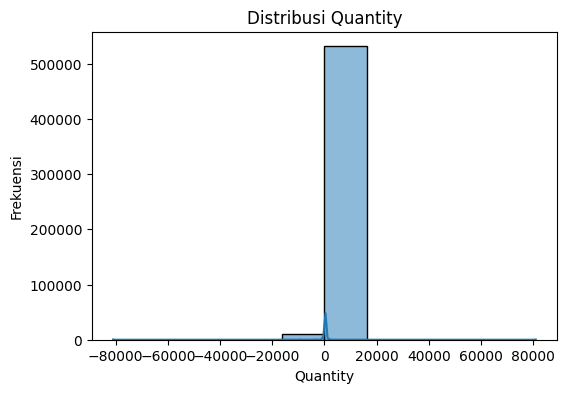

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["Quantity"], bins=10, kde=True)
plt.title("Distribusi Quantity")
plt.xlabel("Quantity")
plt.ylabel("Frekuensi")
plt.show()

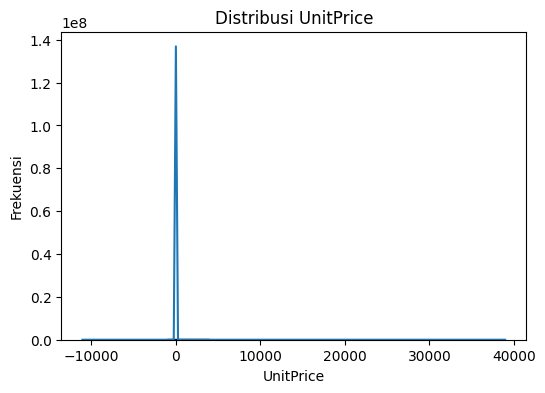

In [ ]:
plt.figure(figsize=(6,4))
sns.histplot(df["UnitPrice"], bins=10, kde=True)
plt.title("Distribusi UnitPrice")
plt.xlabel("UnitPrice")
plt.ylabel("Frekuensi")
plt.show()

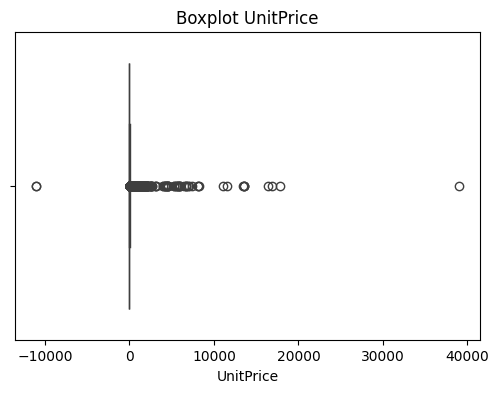

In [ ]:
plt.figure(figsize=(6,4))
sns.boxplot(x=df["UnitPrice"])
plt.title("Boxplot UnitPrice")
plt.show()

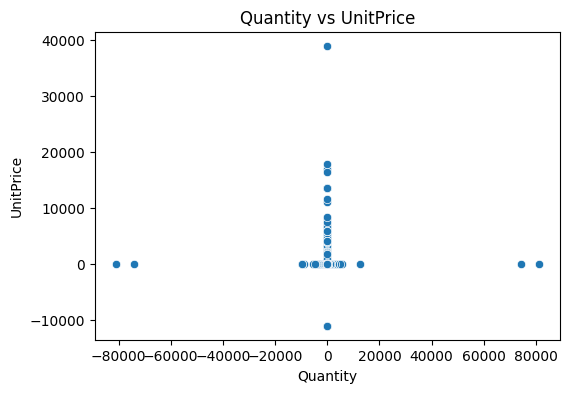

In [ ]:
plt.figure(figsize=(6,4))
sns.scatterplot(x="Quantity", y="UnitPrice", data=df)
plt.title("Quantity vs UnitPrice")
plt.xlabel("Quantity")
plt.ylabel("UnitPrice")
plt.show()

In [ ]:
df_clean = df.copy()
df_clean = df_clean[
    (df_clean["Quantity"] > 0) &
    (df_clean["UnitPrice"] > 0)
]

print("Jumlah data setelah cleaning:", df_clean.shape)

Jumlah data setelah cleaning: (530104, 11)


In [ ]:
df["Total_Price"] = df["Quantity"] * df["UnitPrice"]

In [ ]:
df.describe()

,Quantity,InvoiceDate,UnitPrice,CustomerID,Hour,Day,Month,Total_Price
count,541909.000000,541909,541909.000000,406829.000000,541909.000000,541909.000000,541909.000000,541909.000000
mean,9.552250,2011-07-04 13:34:57.156386048,4.611114,15287.690570,13.078729,15.023096,7.553128,17.987795
min,-80995.000000,2010-12-01 08:26:00,-11062.060000,12346.000000,6.000000,1.000000,1.000000,-168469.600000
25%,1.000000,2011-03-28 11:34:00,1.250000,13953.000000,11.000000,7.000000,5.000000,3.400000
50%,3.000000,2011-07-19 17:17:00,2.080000,15152.000000,13.000000,15.000000,8.000000,9.750000
75%,10.000000,2011-10-19 11:27:00,4.130000,16791.000000,15.000000,22.000000,11.000000,17.400000
max,80995.000000,2011-12-09 12:50:00,38970.000000,18287.000000,20.000000,31.000000,12.000000,168469.600000
std,218.081158,NaN,96.759853,1713.600303,2.443270,8.664063,3.509055,378.810824


In [ ]:
df_ts = df[
    (df["Quantity"] > 0) &
    (df["UnitPrice"] > 0)
].copy()

In [ ]:
df_ts = df_ts.set_index("InvoiceDate")
df_ts = df_ts.sort_index()

In [ ]:
daily_sales = df_ts["Total_Price"].resample("D").sum()
daily_sales = daily_sales.reset_index()
daily_sales.columns = ["Date", "Total_Price"]

print(daily_sales.head())


        Date  Total_Price
0 2010-12-01     58960.79
1 2010-12-02     47748.38
2 2010-12-03     46943.71
3 2010-12-04         0.00
4 2010-12-05     31774.95


In [ ]:
daily_sales["Day"] = daily_sales["Date"].dt.day
daily_sales["Month"] = daily_sales["Date"].dt.month
daily_sales["Year"] = daily_sales["Date"].dt.year
daily_sales["DayOfWeek"] = daily_sales["Date"].dt.dayofweek

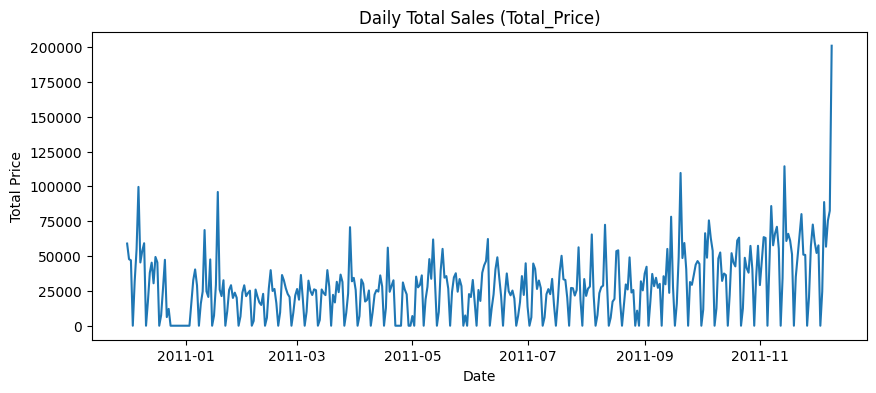

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(daily_sales["Date"], daily_sales["Total_Price"])
plt.title("Daily Total Sales (Total_Price)")
plt.xlabel("Date")
plt.ylabel("Total Price")
plt.show()


In [ ]:
train_size = int(len(daily_sales) * 0.8)

train = daily_sales.iloc[:train_size]
test = daily_sales.iloc[train_size:]

In [ ]:
X_train = train[["Day", "Month", "Year", "DayOfWeek"]]
y_train = train["Total_Price"]

X_test = test[["Day", "Month", "Year", "DayOfWeek"]]
y_test = test["Total_Price"]

In [ ]:
from sklearn.linear_model import LinearRegression

model_ts = LinearRegression()
model_ts.fit(X_train, y_train)


LinearRegression()

In [ ]:
y_pred_ts = model_ts.predict(X_test)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_ts = mean_squared_error(y_test, y_pred_ts)
rmse_ts = np.sqrt(mse_ts)

print("Forecasting Evaluation")
print("MSE :", mse_ts)
print("RMSE:", rmse_ts)


Forecasting Evaluation
MSE : 1003313583.4710156
RMSE: 31675.125626759804


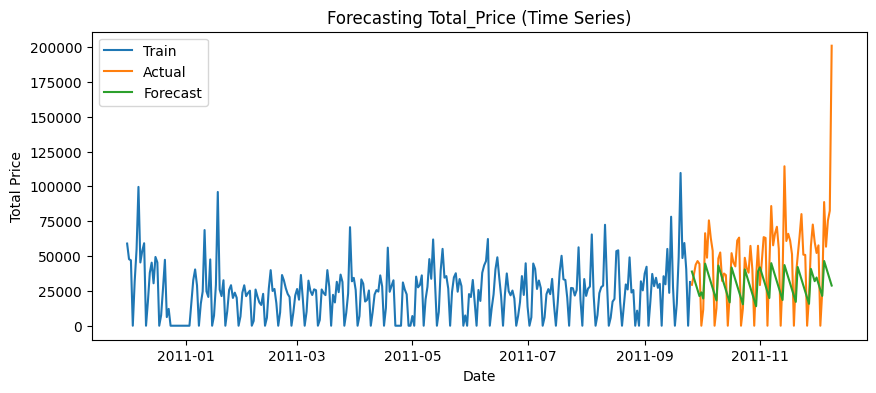

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(train["Date"], train["Total_Price"], label="Train")
plt.plot(test["Date"], y_test.values, label="Actual")
plt.plot(test["Date"], y_pred_ts, label="Forecast")

plt.xlabel("Date")
plt.ylabel("Total Price")
plt.title("Forecasting Total_Price (Time Series)")
plt.legend()
plt.show()

In [ ]:
future_dates = pd.date_range(
    start=daily_sales["Date"].max() + pd.Timedelta(days=1),
    periods=7,
    freq="D"
)

future_df = pd.DataFrame({
    "Date": future_dates
})

future_df["Day"] = future_df["Date"].dt.day
future_df["Month"] = future_df["Date"].dt.month
future_df["Year"] = future_df["Date"].dt.year
future_df["DayOfWeek"] = future_df["Date"].dt.dayofweek

future_forecast = model_ts.predict(
    future_df[["Day", "Month", "Year", "DayOfWeek"]]
)

future_df["Forecast_Total_Price"] = future_forecast
print(future_df)


        Date  Day  Month  Year  DayOfWeek  Forecast_Total_Price
0 2011-12-10   10     12  2011          5          24410.536275
1 2011-12-11   11     12  2011          6          20001.469677
2 2011-12-12   12     12  2011          0          45075.247226
3 2011-12-13   13     12  2011          1          40666.180628
4 2011-12-14   14     12  2011          2          36257.114029
5 2011-12-15   15     12  2011          3          31848.047431
6 2011-12-16   16     12  2011          4          27438.980833


In [ ]:
train_size = int(len(daily_sales) * 0.8)

train = daily_sales.iloc[:train_size]
test = daily_sales.iloc[train_size:]

In [ ]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
from sklearn.linear_model import LinearRegression

model_ts_scaled = LinearRegression()
model_ts_scaled.fit(X_train_scaled, y_train)


LinearRegression()

In [ ]:
y_pred_ts_scaled = model_ts_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error

mse_ts_scaled = mean_squared_error(y_test, y_pred_ts_scaled)
rmse_ts_scaled = np.sqrt(mse_ts_scaled)

print("Linear Regression Forecasting + StandardScaler")
print("MSE  :", mse_ts_scaled)
print("RMSE :", rmse_ts_scaled)

Linear Regression Forecasting + StandardScaler
MSE  : 1003313583.4709924
RMSE : 31675.125626759436


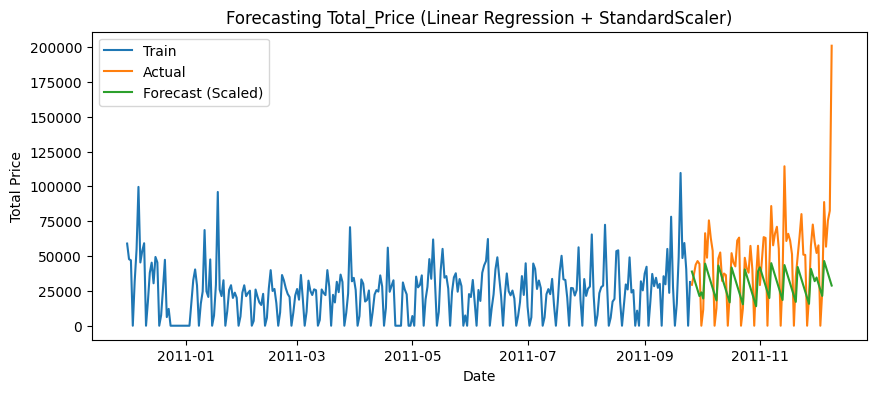

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(train["Date"], train["Total_Price"], label="Train")
plt.plot(test["Date"], y_test.values, label="Actual")
plt.plot(test["Date"], y_pred_ts_scaled, label="Forecast (Scaled)")

plt.xlabel("Date")
plt.ylabel("Total Price")
plt.title("Forecasting Total_Price (Linear Regression + StandardScaler)")
plt.legend()
plt.show()

# **LINEAR REGRESSION WITH SCALLING**

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=42
)

In [ ]:
scaler = StandardScaler()

X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [ ]:
lr_scaled = LinearRegression()
lr_scaled.fit(X_train_scaled, y_train)

LinearRegression()

In [ ]:
y_pred_scaled = lr_scaled.predict(X_test_scaled)

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score

mse_scaled = mean_squared_error(y_test, y_pred_scaled)
rmse_scaled = np.sqrt(mse_scaled)
r2_scaled = r2_score(y_test, y_pred_scaled)

print("Linear Regression + StandardScaler")
print("MSE  :", mse_scaled)
print("RMSE :", rmse_scaled)
print("R2   :", r2_scaled)

Linear Regression + StandardScaler
MSE  : 7260.578257021046
RMSE : 85.20902685174292
R2   : -5.342123036378155e-06


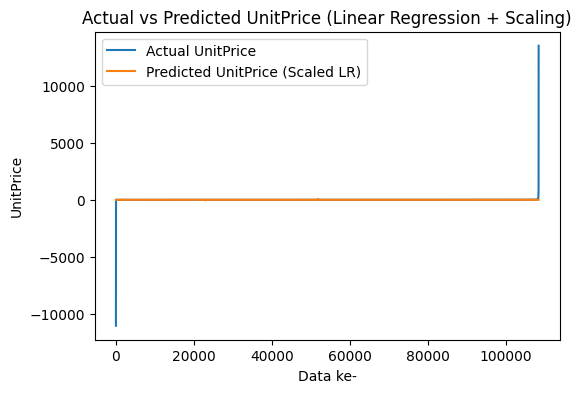

In [ ]:
df_result_scaled = pd.DataFrame({
    "Actual": y_test.values,
    "Predicted": y_pred_scaled
})

df_result_scaled = df_result_scaled.sort_values(by="Actual").reset_index(drop=True)

plt.figure(figsize=(6,4))
plt.plot(df_result_scaled["Actual"], label="Actual UnitPrice")
plt.plot(df_result_scaled["Predicted"], label="Predicted UnitPrice (Scaled LR)")
plt.xlabel("Data ke-")
plt.ylabel("UnitPrice")
plt.title("Actual vs Predicted UnitPrice (Linear Regression + Scaling)")
plt.legend()
plt.show()

# **RANDOM FOREST**

In [ ]:
df["Total_Price"] = df["Quantity"] * df["UnitPrice"]


In [ ]:
df_rf = df[
    (df["Quantity"] > 0) &
    (df["UnitPrice"] > 0)
].copy()


In [ ]:
df_rf = df_rf.set_index("InvoiceDate").sort_index()

daily_rf = df_rf["Total_Price"].resample("D").sum().reset_index()
daily_rf.columns = ["Date", "Total_Price"]

daily_rf.head()


,Date,Total_Price
0,2010-12-01,58960.79
1,2010-12-02,47748.38
2,2010-12-03,46943.71
3,2010-12-04,0.00
4,2010-12-05,31774.95


In [ ]:
daily_rf["Day"] = daily_rf["Date"].dt.day
daily_rf["Month"] = daily_rf["Date"].dt.month
daily_rf["Year"] = daily_rf["Date"].dt.year
daily_rf["DayOfWeek"] = daily_rf["Date"].dt.dayofweek


In [ ]:
X_train = train[["Day", "Month", "Year", "DayOfWeek"]]
y_train = train["Total_Price"]

X_test = test[["Day", "Month", "Year", "DayOfWeek"]]
y_test = test["Total_Price"]


In [ ]:
rf_ts_model = RandomForestRegressor(
    n_estimators=100,
    max_depth=7,
    random_state=42,
    n_jobs=-1
)

rf_ts_model.fit(X_train, y_train)


RandomForestRegressor(max_depth=7, n_jobs=-1, random_state=42)

In [ ]:
y_pred_rf_ts = rf_ts_model.predict(X_test)


In [ ]:
from sklearn.metrics import mean_squared_error

mse_rf_ts = mean_squared_error(y_test, y_pred_rf_ts)
rmse_rf_ts = np.sqrt(mse_rf_ts)

print("Random Forest Forecasting Evaluation")
print("MSE  :", mse_rf_ts)
print("RMSE :", rmse_rf_ts)


Random Forest Forecasting Evaluation
MSE  : 827817547.7566313
RMSE : 28771.8186383244


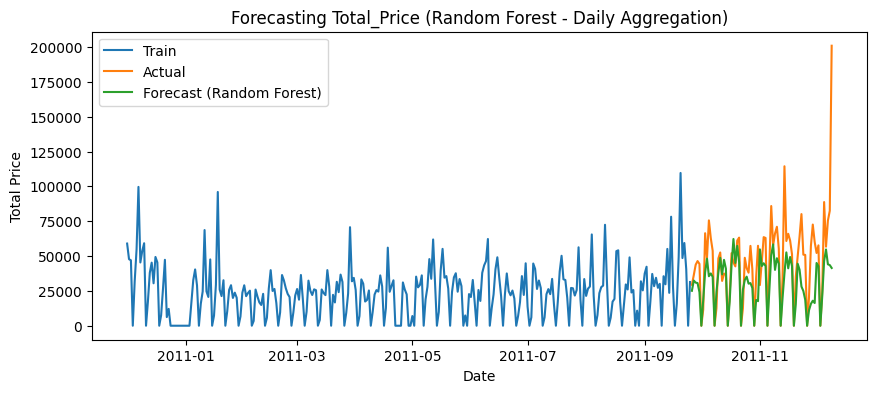

In [ ]:
plt.figure(figsize=(10,4))
plt.plot(train["Date"], train["Total_Price"], label="Train")
plt.plot(test["Date"], y_test.values, label="Actual")
plt.plot(test["Date"], y_pred_rf_ts, label="Forecast (Random Forest)")

plt.xlabel("Date")
plt.ylabel("Total Price")
plt.title("Forecasting Total_Price (Random Forest - Daily Aggregation)")
plt.legend()
plt.show()


In [ ]:
hasil_model_total_price = pd.DataFrame({
    "Model": ["Random Forest Forecasting (Daily)"],
    "RMSE": [rmse_rf_ts],
    "MSE": [mse_rf_ts]
})

hasil_model_total_price


,Model,RMSE,MSE
0,Random Forest Forecasting (Daily),28771.818638,8.278175e+08
